In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv(r'C:\Users\Luis Hiram Hernandez\OneDrive\Escritorio\Proyecto Stadistica\student-mat.csv', delimiter=';')

In [166]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [167]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [168]:
print(df['Medu'].value_counts())
print(df['Fedu'].value_counts())

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


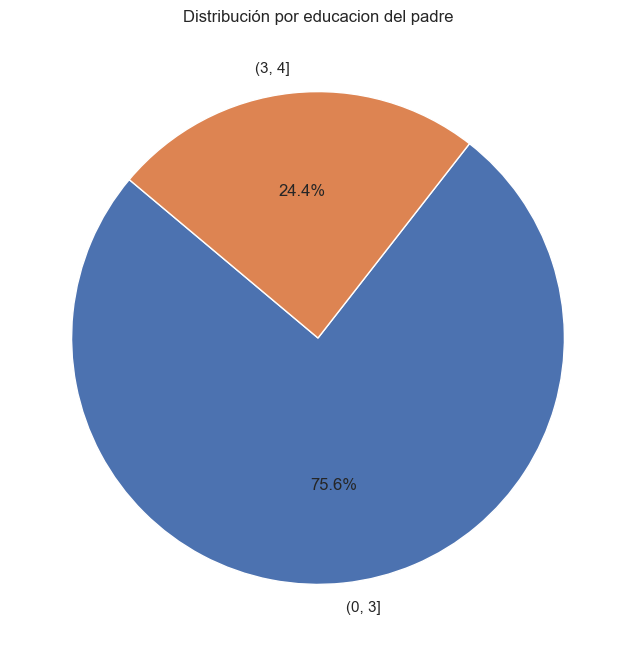

In [169]:
bins=[0, 3, 4]

# Utiliza pd.cut para asignar cada persona a un intervalo
df['Father Education'] = pd.cut(df['Fedu'], bins=bins)

# Cuenta cuántas personas hay en cada grupo
age_group_counts = df['Father Education'].value_counts()

# Crea un gráfico en forma de pie
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por educacion del padre')
plt.show()

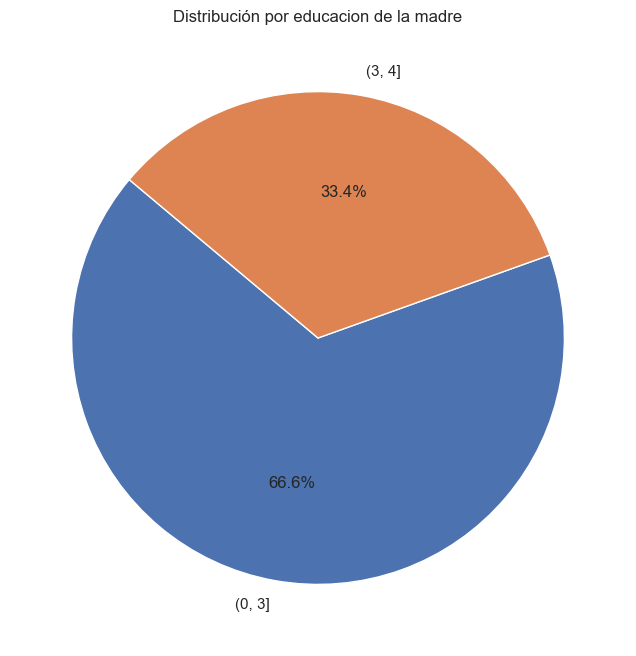

In [170]:
bins=[0, 3, 4]

# Utiliza pd.cut para asignar cada persona a un intervalo
df['Mother Education'] = pd.cut(df['Medu'], bins=bins)

# Cuenta cuántas personas hay en cada grupo
age_group_counts = df['Mother Education'].value_counts()

# Crea un gráfico en forma de pie
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por educacion de la madre')
plt.show()

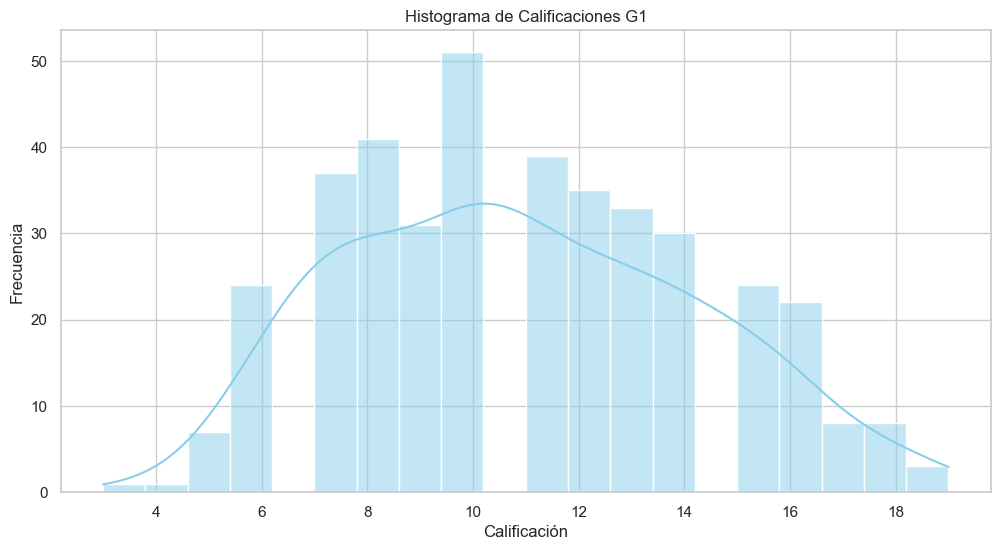

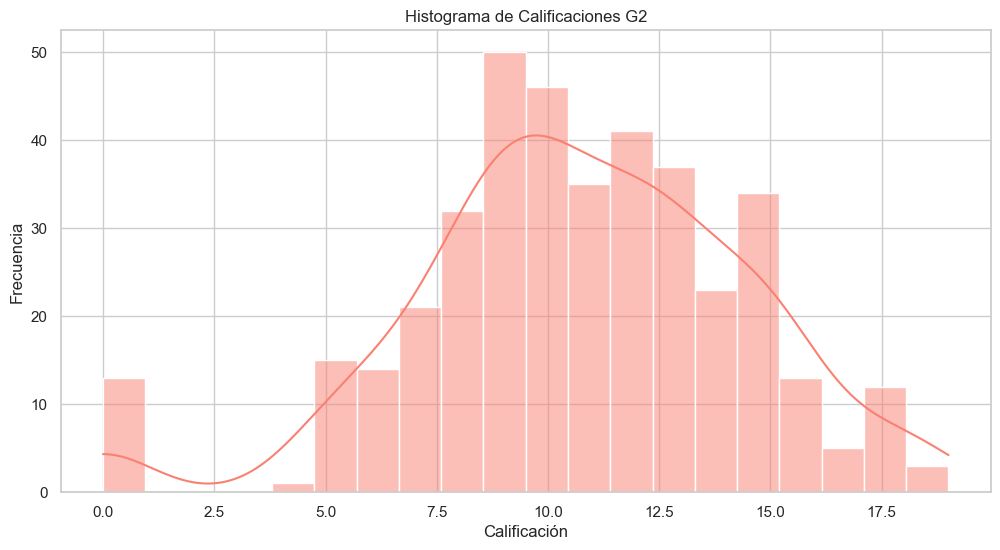

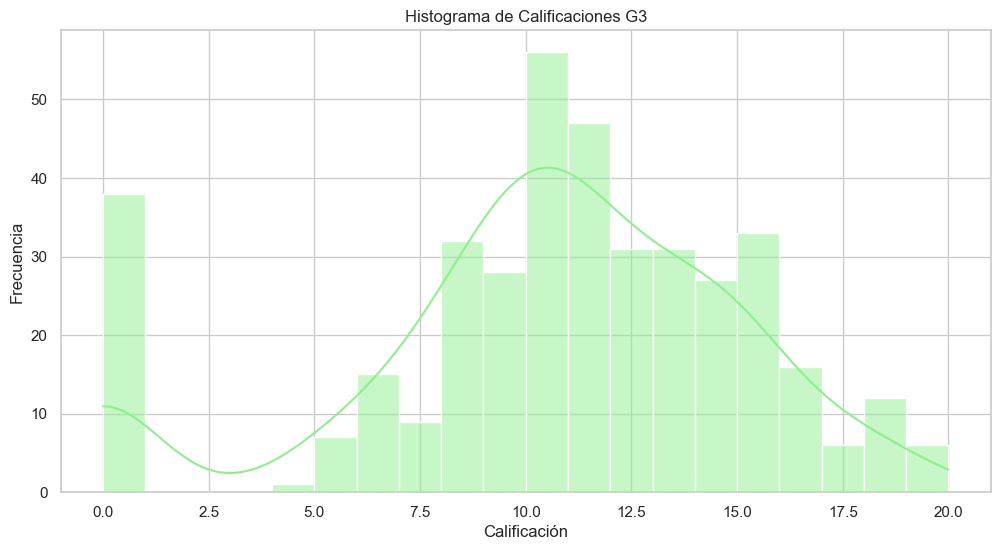

In [171]:
# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Crear histograma para G1
plt.figure(figsize=(12, 6))
sns.histplot(df['G1'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Calificaciones G1')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

# Crear histograma para G2
plt.figure(figsize=(12, 6))
sns.histplot(df['G2'], bins=20, kde=True, color='salmon')
plt.title('Histograma de Calificaciones G2')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

# Crear histograma para G3
plt.figure(figsize=(12, 6))
sns.histplot(df['G3'], bins=20, kde=True, color='lightgreen')
plt.title('Histograma de Calificaciones G3')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

In [172]:
df['G1'].value_counts()

10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64

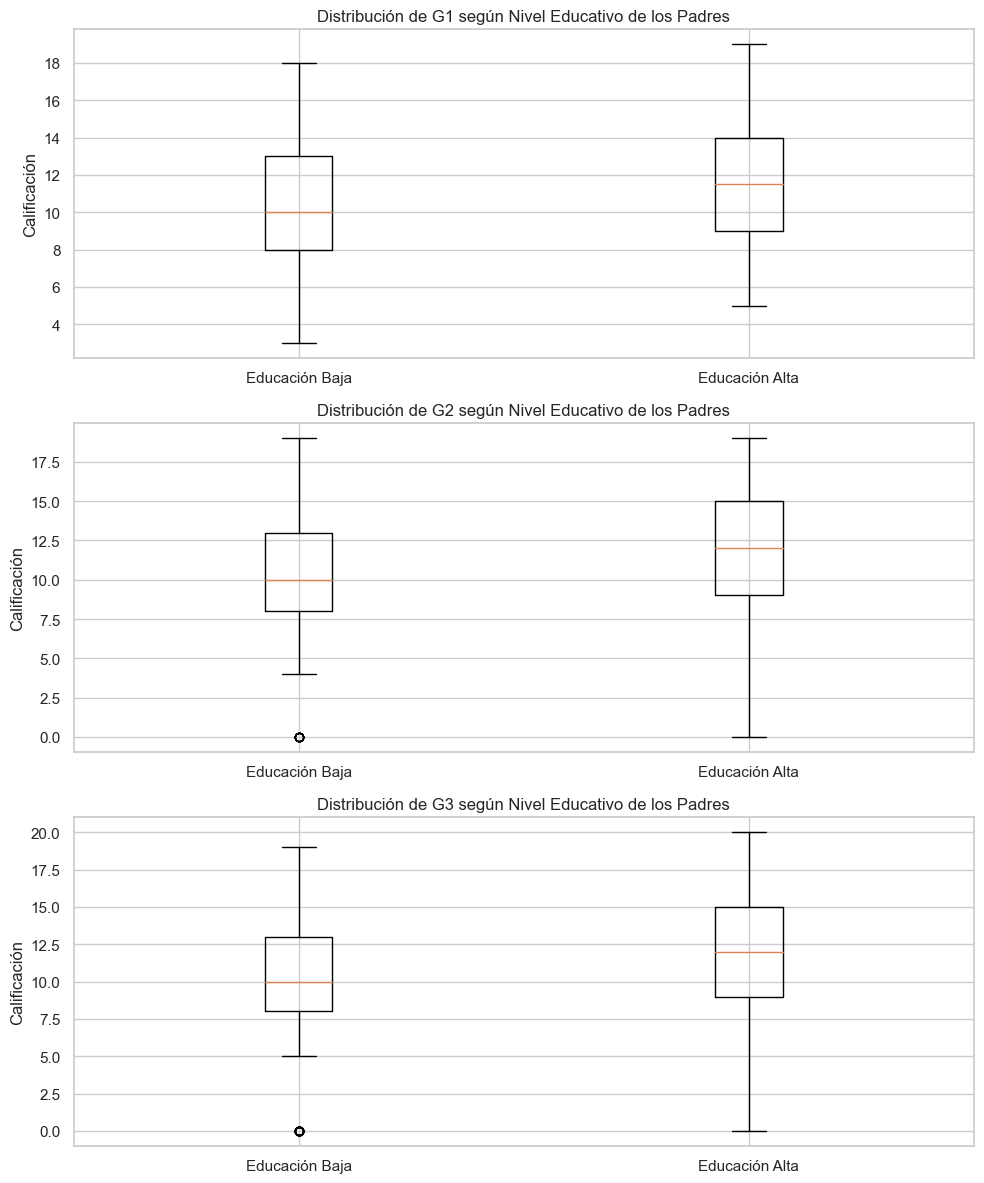

In [173]:
# Asignar niveles educativos a grupos
df['EducacionPadres'] = df[['Medu', 'Fedu']].mean(axis=1)
df['GrupoEducacion'] = pd.cut(df['EducacionPadres'], bins=[0, 3, 4], labels=['Bajo', 'Alto'])

# Visualizaciones comparativas
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

for i, grade in enumerate(['G1', 'G2', 'G3']):
    axs[i].boxplot([df[df['GrupoEducacion'] == 'Bajo'][grade], df[df['GrupoEducacion'] == 'Alto'][grade]],
                   labels=['Educación Baja', 'Educación Alta'])
    axs[i].set_title(f'Distribución de {grade} según Nivel Educativo de los Padres')
    axs[i].set_ylabel('Calificación')

plt.tight_layout()
plt.show()


In [174]:
estadisticas_educacion_baja = df[df['GrupoEducacion'] == 'Bajo'][['G1', 'G2', 'G3']].describe()
estadisticas_educacion_alta = df[df['GrupoEducacion'] == 'Alto'][['G1', 'G2', 'G3']].describe()

print("Estadísticas para Educación Baja:")
print(estadisticas_educacion_baja)

print("\nEstadísticas para Educación Alta:")
print(estadisticas_educacion_alta)

Estadísticas para Educación Baja:
               G1          G2          G3
count  267.000000  267.000000  267.000000
mean    10.494382   10.329588    9.973783
std      3.208741    3.564126    4.460696
min      3.000000    0.000000    0.000000
25%      8.000000    8.000000    8.000000
50%     10.000000   10.000000   10.000000
75%     13.000000   13.000000   13.000000
max     18.000000   19.000000   19.000000

Estadísticas para Educación Alta:
               G1          G2          G3
count  128.000000  128.000000  128.000000
mean    11.773438   11.515625   11.335938
std      3.391083    4.041097    4.709309
min      5.000000    0.000000    0.000000
25%      9.000000    9.000000    9.000000
50%     11.500000   12.000000   12.000000
75%     14.000000   15.000000   15.000000
max     19.000000   19.000000   20.000000


In [175]:
from scipy.stats import ttest_ind

# Crear una nueva columna con el promedio de G1, G2 y G3
df['Promedio'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Dividir el DataFrame en dos grupos basados en el nivel educativo de los padres
grupo_bajo = df[df['GrupoEducacion'] == 'Bajo']['Promedio']
grupo_alto = df[df['GrupoEducacion'] == 'Alto']['Promedio']

# Realizar la prueba t de Student
statistic, p_value = ttest_ind(grupo_bajo, grupo_alto)

# Mostrar resultados
print(f"Estadístico t: {statistic}")
print(f"Valor p: {p_value}")

# Decidir si rechazamos la hipótesis nula (Ho)
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Rechazamos la hipótesis nula: Hay evidencia de una diferencia significativa en el rendimiento académico.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar una diferencia significativa.")


Estadístico t: -3.248670771467895
Valor p: 0.001259180089733174
Rechazamos la hipótesis nula: Hay evidencia de una diferencia significativa en el rendimiento académico.


In [176]:
from scipy.stats import t

# Nivel de significancia (α)
alpha = 0.05

# Grados de libertad (df)
df = len(calificaciones_bajo) + len(calificaciones_alto) - 2

# Valor crítico de t para prueba de dos colas
t_critical = t.ppf(1 - alpha/2, df)

# Imprimir valor crítico
print(f"Valor crítico de t: {t_critical}")


Valor crítico de t: 1.9660186149089718
